# Ejercicio 1
Haga uso de la cuadratura de Gauss, el metodo de trapecio y la regla de simpson para calcular las siguientes integrales:
$$\int_{0}^{\infty}\left(\frac{\sin(x)}{x}\right)^{n}dx,$$
con $n=1,\ldots ,6$, a partir de sus resultados estime el resultado de la integral.
¿Cómo puede determinar con que valor quedarse de la integral?
¿Que estimado obtiene de la integral?
Prepare una grafica del valor de la integral en función del numero de pasos para el caso de la cuadratura.
¿Cómo puede explicar el comportamiento que este exhibe?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial as P

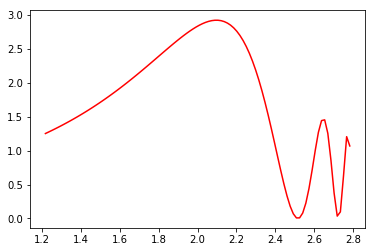

In [49]:
#Deifine el integrando
d=1
a=1.2
g=3
b=2.8
def f(z,n=2):
    return (g+d)*((np.sin((z-d)/(g-z))/(z-d))**n)*(g-z)**(n-2)

#Grafica
t=np.linspace(a,b,100)[1:-1]
plt.plot(t,f(t,2),c="r")

In [52]:

#Metodo del Trapecio
def trapInt(N, a, b, n):
    Int=0
    h=(b-a)/(N-1)
    for i in range(1,N):
        x_i=a+(i-1)*h
        x_i1=a+(i)*h
        Int+= (f(x_i,n)+f(x_i1,n))*h/2
        #plt.plot([x_i,x_i1],[f(x_i,n),f(x_i1,n)])
    return Int
Int=trapInt(100, a, b,2)
print(Int)


#Metodo de Simpson
def SimpsInt(N, a, b, n):
    if N%2==0:
        N+=1
    Int=0
    h=(b-a)/(N-1)
    for i in range(1,N,2):
        x_1i=a+(i-1)*h
        x_i=a+(i)*h
        x_i1=a+(i+1)*h
        
        Int+= (f(x_1i,n)+4*f(x_i,n)+f(x_i1,n))*h/3
        cc,bb,aa=P.polynomial.polyfit([x_1i,x_i,x_i1], [f(x_1i,n),f(x_i,n),f(x_i1,n)], deg=2)
        t=np.linspace(x_1i,x_i1,int(100/N))
        #plt.plot(t,aa*t**2+bb*t+cc)
    return Int
Int=SimpsInt(100, a, b, 2)
print(Int)



2.812455259212293
2.813843467144746


In [53]:
#Clase
N=1000
def gauss_legendre(N,a,b,n):
    x,w=np.polynomial.legendre.leggauss(N)
    Int=sum(f((b-a)*x/2+(b+a)/2,n)*w)
    return (b-a)*Int/2
print(gauss_legendre(N,a,b,2))

2.8135559142293136


In [69]:
intt_N=[]
Nn=range(10,100)
for n in range(1,7):
    intt_N.append([[],[],[]])
    for N in Nn:
        intt_N[n-1][0].append(trapInt(N, a, b, n))
        intt_N[n-1][1].append(SimpsInt(N, a, b, n))
        intt_N[n-1][2].append(gauss_legendre(N,n))

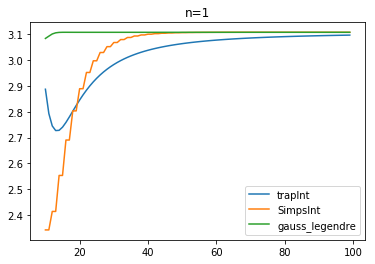

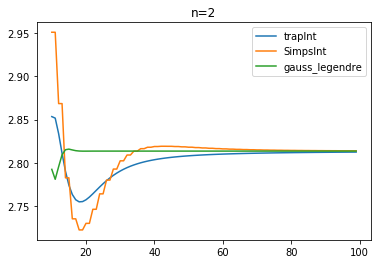

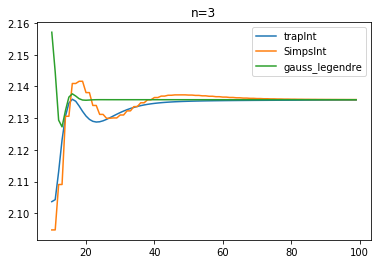

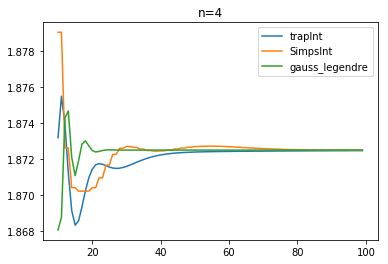

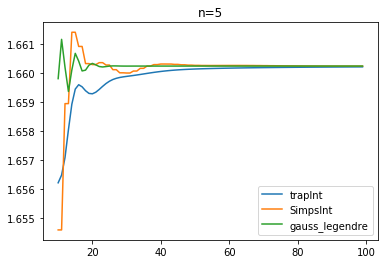

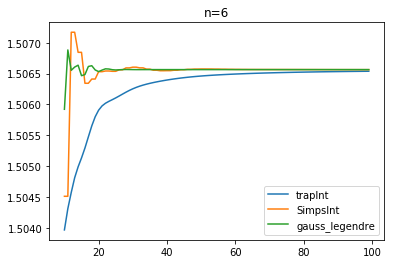

In [73]:
for n in range(1,7):
    plt.figure()
    plt.title("n="+str(n))
    plt.plot(Nn,intt_N[n-1][0],label="trapInt")
    plt.plot(Nn,intt_N[n-1][1],label="SimpsInt")
    plt.plot(Nn,intt_N[n-1][2],label="gauss_legendre")
    plt.xlabel("$")
    plt.legend()

# Ejercicio 2
Haciendo uso de un metodo de Monte Carlo calcule la siguiente integral:

$$I=\int_{0}^{1}\int_{0}^{1}\int_{0}^{1}xyz\log(x+2y+3z)\sin(x+y+z)dxdydz$$

In [47]:
def f1(l):
    return l[0]*l[1]*l[2]*np.log(l[0]+2*l[1]+3*l[2])*np.sin(sum(l))

def integral(Num_trials=16,N=100):
    Ints=[]
    for i in range(Num_trials):
        fs=[]
        for j in range(N):
            x=np.random.rand(3)
            fs.append(f1(x))
        promedio_f=np.mean(fs)
        Ints.append(promedio_f)
    promedio_trials=np.mean(Ints)
    return promedio_trials
#1
print(integral())

0.13888175767316657
